In [1]:
import pandas as pd
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp
import numpy as np
from hyperopt import Trials, tpe, fmin
import warnings
from imblearn.under_sampling import RandomUnderSampler
from joblib import load
import statistics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, precision_score, recall_score
import time
warnings.filterwarnings("ignore")

In [2]:
ma = pd.read_csv("../16 Mycoplosma/ma.csv")
map = pd.read_csv("../16 Mycoplosma/map.csv")
marth = pd.read_csv("../16 Mycoplosma/marth.csv")
mcap = pd.read_csv("../16 Mycoplosma/mcap.csv")
mcon = pd.read_csv("../16 Mycoplosma/mcon.csv")
mcro = pd.read_csv("../16 Mycoplosma/mcro.csv")
mgal = pd.read_csv("../16 Mycoplosma/mgal.csv")
mhom = pd.read_csv("../16 Mycoplosma/mhom.csv")
mhyoJ = pd.read_csv("../16 Mycoplosma/mhyoJ.csv")
mhyo232 = pd.read_csv("../16 Mycoplosma/mhyo232.csv")
mhyo7448 = pd.read_csv("../16 Mycoplosma/mhyo7448.csv")
mm163K = pd.read_csv("../16 Mycoplosma/mm163K.csv")
mms = pd.read_csv("../16 Mycoplosma/mms.csv")
mpHF = pd.read_csv("../16 Mycoplosma/mpHF.csv")
mpM = pd.read_csv("../16 Mycoplosma/mpM.csv")
ms53 = pd.read_csv("../16 Mycoplosma/ms53.csv")

In [3]:
def generate_train_test_dataset(index):
    dataset_names = [ma, map, marth, mcap, mcon, mcro, mgal, mhom, mhyoJ, mhyo232, mhyo7448, mm163K, mms, mpHF, mpM, ms53]
    merged_train = dataset_names[:index]+dataset_names[index+1:]
    train_data = pd.concat(merged_train)
    test_data = dataset_names[index]
    return train_data,test_data

In [4]:
def handle_dataset(dataset):
    columns_to_drop = ['identity','name', 'Amino acid', 'protein_sequence', 'essentiality']
    Xs = dataset.drop(columns = columns_to_drop)
    y = dataset['essentiality']
    return Xs,y

In [5]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [9]:
model_svm = load('../../model/SVM_model_FSS.joblib')
feature_svm = ['GC_Content', 'CAI', 'A', 'R', 'N', 'D', 'E', 'G', 'H', 'K', 'M', 'F', 'S', 'T', 'Y', 'V']
scores_svm_ac = []
scores_svm_mcc = []
scores_svm_auc = []
scores_svm_f1 = []
scores_svm_precision = []
scores_svm_recall = []
running_svm = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    start_time = time.time()
    model_svm.fit(X_resampled[feature_svm],y_resampled)
    y_predict = model_svm.predict(Xs_test[feature_svm])
    end_time = time.time()
    running_svm.append(end_time-start_time)
    acc=accuracy_score(y_test, y_predict)
    scores_svm_ac.append(acc)
    auc = roc_auc_score(y_test,y_predict)
    scores_svm_auc.append(auc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_svm_mcc.append(mcc)
    f1 = f1_score(y_test,y_predict)
    scores_svm_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_svm_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_svm_recall.append(recall)

In [11]:
print(scores_svm_ac)
print(statistics.mean(scores_svm_ac),statistics.variance(scores_svm_ac))

[0.9018567639257294, 0.8633540372670807, 0.7484276729559748, 0.9224489795918367, 0.8895705521472392, 0.9096045197740112, 0.7578692493946732, 0.932258064516129, 0.615606936416185, 0.8838896952104499, 0.884393063583815, 0.9504132231404959, 0.940149625935162, 0.945, 0.5728744939271255, 0.8735955056179775]
0.8494570239627428 0.013377539206194894


In [10]:
model_rf = load('../../model/RF_model_FSS.joblib')
scores_rf_ac = []
scores_rf_mcc= []
scores_rf_f1 = []
scores_rf_auc = []
scores_rf_precision = []
scores_rf_recall = []
running_rf = []
feature_rf = ['GC_Content', 'CAI', 'A', 'R', 'N', 'D', 'G', 'K', 'F', 'S', 'T', 'Y', 'V', 'nSE2', 'nSE3', 'nGE2', 'nGE3']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    start_time = time.time()
    model_rf.fit(X_resampled[feature_rf],y_resampled)
    y_predict = model_rf.predict(Xs_test[feature_rf])
    end_time=time.time()
    running_rf.append(end_time-start_time)
    acc=accuracy_score(y_test, y_predict)
    scores_rf_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_rf_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_rf_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_rf_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_rf_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_rf_recall.append(recall)

In [9]:
print(scores_rf_ac)
print(statistics.mean(scores_rf_ac),statistics.variance(scores_rf_ac))

[0.9124668435013262, 0.865424430641822, 0.6477987421383647, 0.9795918367346939, 0.8588957055214724, 0.9322033898305084, 0.6561743341404358, 0.9516129032258065, 0.49710982658959535, 0.8243831640058055, 0.8410404624277457, 0.9449035812672176, 0.9900249376558603, 0.9725, 0.5668016194331984, 0.8932584269662921]
0.833386887755009 0.024206272895143686


In [6]:
model_xgb = load('../../model/XGB_model_FSS.joblib')
scores_xgb_ac = []
scores_xgb_mcc = []
scores_xgb_auc = []
scores_xgb_f1 = []
scores_xgb_precision = []
scores_xgb_recall = []
feature_xgb = ['CAI', 'A', 'N', 'D', 'C', 'G', 'H', 'T', 'V', 'nSE2', 'nGE2']
running_times= []

for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    start_time = time.time()
    model_xgb.fit(X_resampled[feature_xgb],y_resampled)
    y_predict = model_xgb.predict(Xs_test[feature_xgb])
    end_time = time.time()
    running_times.append(end_time-start_time)
    acc=accuracy_score(y_test, y_predict)
    scores_xgb_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_xgb_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_xgb_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_xgb_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_xgb_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_xgb_recall.append(recall)

In [8]:
print(statistics.mean(running_times),statistics.variance(running_times))

0.24127192795276642 0.00641891702526678


In [11]:
print(statistics.mean(running_rf),statistics.variance(running_rf))
print(statistics.mean(running_svm),statistics.variance(running_svm))

0.6890943050384521 0.026946836914597348
0.03720170259475708 0.00028816412722107996


In [7]:
print(scores_xgb_ac)
print(statistics.mean(scores_xgb_ac),statistics.variance(scores_xgb_ac))

[0.8647214854111406, 0.855072463768116, 0.7169811320754716, 0.8775510204081632, 0.8220858895705522, 0.8615819209039548, 0.7070217917675545, 0.9225806451612903, 0.523121387283237, 0.9172714078374455, 0.9219653179190751, 0.90633608815427, 0.8528678304239401, 0.925, 0.5404858299595142, 0.848314606741573]
0.8164349260865812 0.016563778503301808


In [10]:
def generateString(scores):
    mean_score = round(np.mean(scores),4)
    var_score = round(np.var(scores),4)
    return f'{mean_score}±{var_score}'
import csv
with open('RFELasso.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['XGB',generateString(scores_xgb_ac),generateString(scores_xgb_mcc),generateString(scores_xgb_auc),generateString(scores_xgb_f1),generateString(scores_xgb_precision),generateString(scores_xgb_recall)])
    writer.writerow(['SVM',generateString(scores_svm_ac),generateString(scores_svm_mcc),generateString(scores_svm_auc),generateString(scores_svm_f1),generateString(scores_svm_precision),generateString(scores_svm_recall)])
    writer.writerow(['RF',generateString(scores_rf_ac),generateString(scores_rf_mcc),generateString(scores_rf_auc),generateString(scores_rf_f1),generateString(scores_rf_precision),generateString(scores_rf_recall)])

In [12]:
with open('Lasso_scores.txt', 'w') as file:
    file.write("scores_svm_acc:\n")
    np.savetxt(file,scores_svm_ac,fmt='%1.6f')
    file.write("scores_svm_mcc:\n")
    np.savetxt(file,scores_svm_mcc,fmt='%1.6f')
    file.write("scores_svm_f1:\n")
    np.savetxt(file,scores_svm_f1,fmt='%1.6f')
    file.write("scores_svm_auc:\n")
    np.savetxt(file,scores_svm_auc,fmt='%1.6f')
    file.write("scores_svm_precision:\n")
    np.savetxt(file,scores_svm_precision,fmt='%1.6f')
    file.write("scores_svm_recall:\n")
    np.savetxt(file,scores_svm_recall,fmt='%1.6f')
    file.write("scores_xgb_acc:\n")
    np.savetxt(file,scores_xgb_ac,fmt='%1.6f')
    file.write("scores_xgb_auc:\n")
    np.savetxt(file,scores_xgb_auc,fmt='%1.6f')
    file.write("scores_xgb_mcc:\n")
    np.savetxt(file,scores_xgb_mcc,fmt='%1.6f')
    file.write("scores_xgb_f1:\n")
    np.savetxt(file,scores_xgb_f1,fmt='%1.6f')
    file.write("scores_xgb_precision:\n")
    np.savetxt(file, scores_xgb_precision,fmt='%1.6f')
    file.write("scores_xgb_recall:\n")
    np.savetxt(file, scores_xgb_recall,fmt='%1.6f')
    file.write("scores_rf_acc:\n")
    np.savetxt(file,scores_rf_ac,fmt='%1.6f')
    file.write("scores_rf_auc:\n")
    np.savetxt(file,scores_rf_auc,fmt='%1.6f')
    file.write("scores_rf_mcc:\n")
    np.savetxt(file,scores_rf_mcc,fmt='%1.6f')
    file.write("scores_rf_f1:\n")
    np.savetxt(file,scores_rf_f1,fmt='%1.6f')
    file.write("scores_rf_precision:\n")
    np.savetxt(file,scores_rf_precision,fmt='%1.6f')

In [14]:
import csv

with open('Lasso+RFE.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['RF',np.mean(scores_rf_ac),np.mean(scores_rf_mcc),np.mean(scores_rf_auc),np.mean(scores_rf_f1),np.mean(scores_rf_precision),np.mean(scores_rf_recall)])
    writer.writerow(['XGB',np.mean(scores_xgb_ac),np.mean(scores_xgb_mcc),np.mean(scores_xgb_auc),np.mean(scores_xgb_f1),np.mean(scores_xgb_precision),np.mean(scores_xgb_recall)])
    writer.writerow(['SVM',np.mean(scores_svm_ac),np.mean(scores_svm_mcc),np.mean(scores_svm_auc),np.mean(scores_svm_f1),np.mean(scores_svm_precision),np.mean(scores_svm_recall)])

In [20]:
from scipy.stats import ks_2samp
p_values = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_xgb.fit(X_resampled[feature_xgb],y_resampled)
    y_predict_xgb = model_xgb.predict(Xs_test[feature_xgb])
    model_svm.fit(X_resampled[feature_svm],y_resampled)
    y_predict_svm = model_svm.predict(Xs_test[feature_svm])
    ks_statistic, p_value = ks_2samp(y_predict_xgb,y_predict_svm)
    p_values.append(p_value)
print(np.mean(p_values))

0.305392630606406


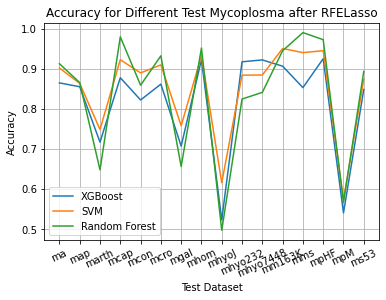

In [3]:
from matplotlib import pyplot as plt
scores_xgb_ac = [0.8647214854111406, 0.855072463768116, 0.7169811320754716, 0.8775510204081632, 0.8220858895705522, 0.8615819209039548, 0.7070217917675545, 0.9225806451612903, 0.523121387283237, 0.9172714078374455, 0.9219653179190751, 0.90633608815427, 0.8528678304239401, 0.925, 0.5404858299595142, 0.848314606741573]
scores_svm_ac = [0.9018567639257294, 0.8633540372670807, 0.7484276729559748, 0.9224489795918367, 0.8895705521472392, 0.9096045197740112, 0.7578692493946732, 0.932258064516129, 0.615606936416185, 0.8838896952104499, 0.884393063583815, 0.9504132231404959, 0.940149625935162, 0.945, 0.5728744939271255, 0.8735955056179775]
scores_rf_ac = [0.9124668435013262, 0.865424430641822, 0.6477987421383647, 0.9795918367346939, 0.8588957055214724, 0.9322033898305084, 0.6561743341404358, 0.9516129032258065, 0.49710982658959535, 0.8243831640058055, 0.8410404624277457, 0.9449035812672176, 0.9900249376558603, 0.9725, 0.5668016194331984, 0.8932584269662921]

x = ["ma", "map", "marth", "mcap", "mcon", "mcro", "mgal", "mhom", "mhyoJ", "mhyo232", "mhyo7448", "mm163K", "mms", "mpHF", "mpM", "ms53"]
plt.plot(x, scores_xgb_ac, label='XGBoost')
plt.plot(x, scores_svm_ac, label='SVM')
plt.plot(x, scores_rf_ac, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for Different Test Mycoplosma after Lasso')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('../ACC_Lasso.jpg')
plt.show()

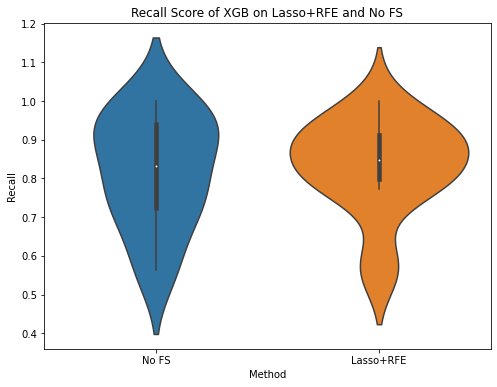

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  
no_fs = [0.9130434782608695, 0.8, 0.5625, 1.0, 0.7894736842105263, 0.8076923076923077, 0.9130434782608695, 0.8947368421052632, 0.875, 0.9354838709677419, 0.9375, 0.7727272727272727, 0.8, 0.9, 0.5756097560975609, 0.8181818181818182]

data = pd.DataFrame({
    "Recall": scores_xgb_recall + no_fs,
    "Method": ["Lasso+RFE"] * len(scores_xgb_recall) + ["No FS"] * len(no_fs)
})
    
df = pd.DataFrame(data)
sns.violinplot(x="Method", y="Recall", data=data)

plt.title('Recall Score of XGB on Lasso+RFE and No FS')  
plt.savefig('../Recall_Violin.jpg')
plt.show()

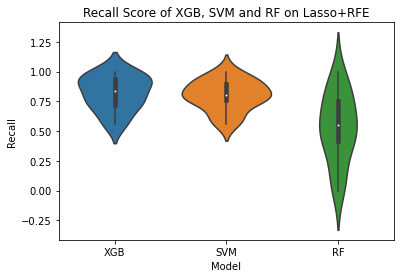

In [17]:
data = pd.DataFrame({
    "Recall": scores_xgb_recall + scores_svm_recall+scores_rf_recall,
    "Model": ["XGB"] * len(scores_xgb_recall) + ["SVM"] * len(scores_svm_recall) + ["RF"]*len(scores_rf_recall)
})
    
df = pd.DataFrame(data)
sns.violinplot(x="Model", y="Recall", data=data)

plt.title('Recall Score of XGB, SVM and RF on Lasso+RFE')  
plt.savefig('../Model_Violin.jpg')
plt.show()

<Figure size 2160x2160 with 0 Axes>

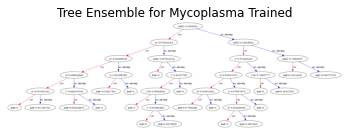

In [34]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'D:/Graphviz-10.0.1-win64/bin'

plt.figure(figsize=(30,30)) 
plot_tree(model_xgb, num_trees=1,fontsize = 20)
plt.title("Tree Ensemble for Mycoplasma Trained")
plt.savefig("../xgb_fss2",dpi=1000)
plt.show()

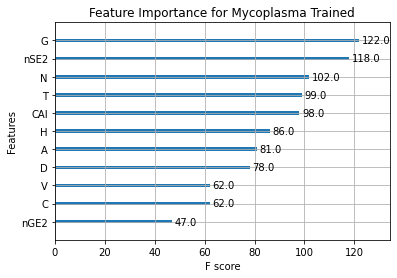

In [35]:
from xgboost import plot_importance
plot_importance(model_xgb)
plt.title("Feature Importance for Mycoplasma Trained")
plt.savefig("../feature importance", bbox_inches='tight')
plt.show()